### 파일 불러오기

In [82]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


adult_df_og = pd.read_csv('adult.csv',header = None , index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])


adult_df = adult_df_og.copy()
adult_df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### 파일의 기본 정보 확인

##### age : 나이
##### workclass : 고용 형태
##### fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
##### education : 교육 수준
##### education_num : 교육 수준 수치
##### marital_status: 결혼 상태
##### occupation : 업종
##### relationship : 가족 관계
##### race : 인종
##### sex : 성별
##### capital_gain : 양도 소득
##### capital_loss : 양도 손실
##### hours_per_week : 주당 근무 시간
##### native_country : 국적
##### income : 수익 (예측해야 하는 값)

In [83]:
print(adult_df.columns)   

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


#### dataframe의 정보확인
#### null값 확인
#### 'object'는 숫자형이 아닌 자료형 데이터이므로 전처리과정 필요

In [84]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 라벨 인코딩 ( >50K = 1,  <=50K = 0 )

In [85]:
#income의 문자열데이터를 0,1로 바꾸기 (object -> (adult_df['income'] == ' >50K')은 bool형) -> int)
adult_df['income'] = (adult_df['income'] == ' >50K').astype(int)
adult_df['income']


0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int32

### feature에 어떤 값들이 있는지 확인 

### feature 값 중 '?' 가 있다는 것을 확인함. 그리고 대략적인 값의 분포를 확인

In [86]:
#피처값이 몇개씩 있는지 확인
adult_df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [87]:
adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


#### feature 값의 분포 시각화 

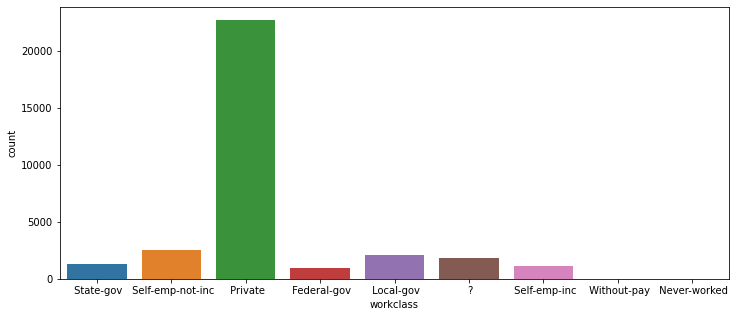

In [88]:
fig,ax= plt.subplots(1,1,figsize=(12,5))#plot의 크기 지정 
sns.countplot(data=adult_df,x='workclass',ax=ax)#피처값 시각화
plt.show()

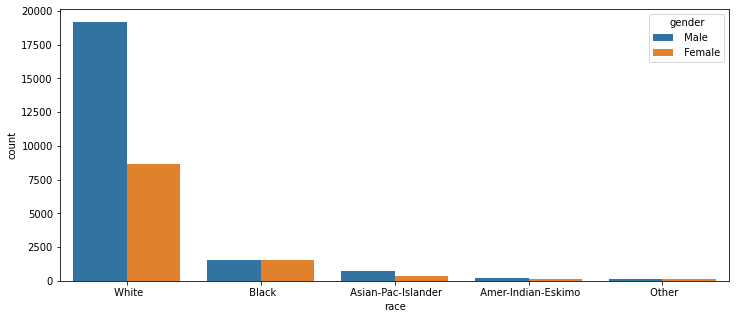

In [89]:
fig,ax= plt.subplots(1,1,figsize=(12,5))#plot의 크기 지정 
sns.countplot(data=adult_df,x='race',ax=ax,hue='gender')
#피처값 시각화,#hue='',''값에 따라 다른 색상막대로 나누어 확인 가능 
plt.show()

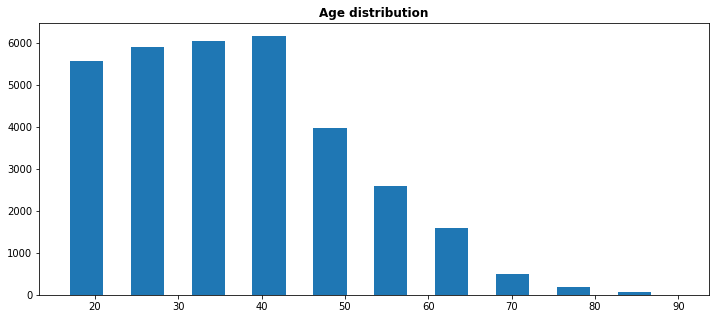

In [90]:
fig,ax= plt.subplots(1,1,figsize=(12,5))#plot의 크기 지정 
ax.hist(adult_df['age'],width=4)#히스토그램 #width라인 간격 조정 가능 
ax.set_title('Age distribution',fontweight='bold')
plt.show()

c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

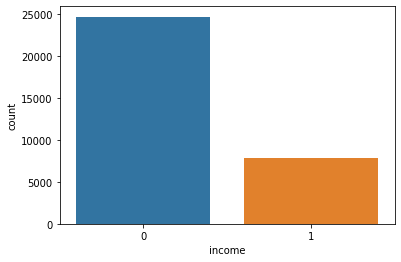

In [91]:
sns.countplot('income', data=adult_df)

### 데이터 전처리
### 1. feature와 label(income)과의 관계 확인  

#### education education-num

In [92]:
adult_df.groupby(['education','education-num'])[['income']].mean()

,,income
education,education-num,
10th,6,0.066452
11th,7,0.051064
12th,8,0.076212
1st-4th,2,0.035714
5th-6th,3,0.048048
7th-8th,4,0.061920
9th,5,0.052529
Assoc-acdm,12,0.248360
Assoc-voc,11,0.261216


In [93]:
adult_df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [94]:
adult_df['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

#### 2 .'?'(결측치) 채우기

In [95]:
missing_columns = ['workclass', 'occupation', 'native-country']  #찾아보니 3개의 feature안에 '?' 있음
adult_df[missing_columns] == ' ?'

,workclass,occupation,native-country
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
32556,False,False,False
32557,False,False,False
32558,False,False,False
32559,False,False,False


In [96]:
(adult_df[missing_columns] == ' ?').sum()

workclass         1836
occupation        1843
native-country     583
dtype: int64

In [97]:
for column in missing_columns:
    adult_df.loc[adult_df_og[column] == ' ?', column] = adult_df_og[column].mode()[0]  #최빈값으로 바꿔줌. 
    

In [98]:
adult_df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [99]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


### 3. 'capital-gain', 	'capital-loss' 값 조정 

In [100]:
adult_df['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: capital-gain, Length: 119, dtype: int64

<AxesSubplot:ylabel='Frequency'>

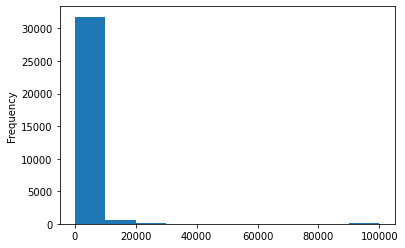

In [101]:
adult_df['capital-gain'].plot.hist()

In [102]:
adult_df['capital-loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

<AxesSubplot:ylabel='Frequency'>

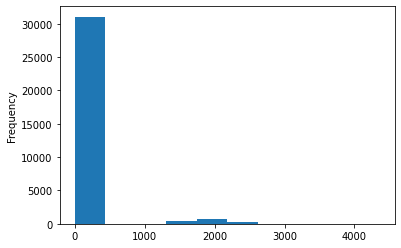

In [103]:
adult_df['capital-loss'].plot.hist()

#### 너무 값이 한쪽으로 치우쳐있다. 로그함수를 사용하여 'capital-gain'과 'capital-loss' 각각의 값의차이를 줄여보자 (x축 한 눈금을 보면 차이를 알 수 있음.)

In [104]:
adult_df['capital-gain'] = adult_df_og['capital-gain'].map(lambda x : np.log(x) if x != 0 else 0)
adult_df['capital-loss'] = adult_df_og['capital-loss'].map(lambda x : np.log(x) if x != 0 else 0)

<AxesSubplot:ylabel='Frequency'>

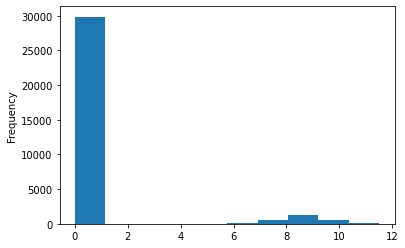

In [105]:
adult_df['capital-gain'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

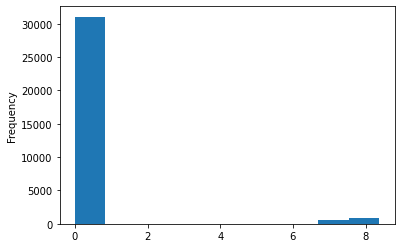

In [106]:
adult_df['capital-loss'].plot.hist()

In [107]:
adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,20,United-States,0


In [108]:
from sklearn.preprocessing import LabelEncoder



# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['education','marital-status'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    
    features = ['workclass','fnlwgt','occupation','relationship','race','gender','native-country']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = drop_features(df)
    df = format_features(df)
    return df


In [109]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
adult_df_og = pd.read_csv('adult.csv',header = None , index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

adult_df = transform_features(adult_df)

y_adult_df = adult_df['income']
X_adult_df= adult_df.drop('income',axis=1)




In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
##데이터분할
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
##데이터
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
## 이상 항상 불러오는 모듈? 파라미터들
from sklearn.linear_model import LogisticRegression

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_adult_df, y_adult_df, \
                                                  test_size=0.2, random_state=11)


In [118]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier 정밀도: {0: 4f}'.format(precision_score(y_test,dt_pred)))
print('DecisionTreeClassifier 재현율: {0: 4f}\n'.format(recall_score(y_test,dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('RandomForestClassifier 정밀도: {0: 4f}'.format(precision_score(y_test,rf_pred)))
print('RandomForestClassifier 재현율: {0: 4f}\n'.format(recall_score(y_test,rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression 정밀도: {0: 4f}'.format(precision_score(y_test,lr_pred)))
print('LogisticRegression 재현율: {0: 4f}'.format(recall_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도: 0.8093
DecisionTreeClassifier 정밀도:  0.580910
DecisionTreeClassifier 재현율:  0.613485

RandomForestClassifier 정확도:0.8637
RandomForestClassifier 정밀도:  0.742063
RandomForestClassifier 재현율:  0.624166

LogisticRegression 정확도: 0.7880
LogisticRegression 정밀도:  0.578313
LogisticRegression 재현율:  0.288385


c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_adult_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_adult_df.values[train_index], X_adult_df.values[test_index]
        y_train, y_test = y_adult_df.values[train_index], y_adult_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.8108
교차 검증 1 정확도: 0.8021
교차 검증 2 정확도: 0.8096
교차 검증 3 정확도: 0.8182
교차 검증 4 정확도: 0.8113
평균 정확도: 0.8104


In [115]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_adult_df , y_adult_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.8073
교차 검증 1 정확도: 0.8053
교차 검증 2 정확도: 0.8087
교차 검증 3 정확도: 0.8119
교차 검증 4 정확도: 0.8134
평균 정확도: 0.8093


In [116]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8491
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8627


In [117]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, rf_pred)

array([[4690,  325],
       [ 563,  935]], dtype=int64)

In [119]:
X = X_adult_df.iloc[:, :-1]
y = X_adult_df.iloc[:, -1]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[4700  315]
 [1066  432]]
정확도: 0.7880, 정밀도: 0.5783, 재현율: 0.2884,    F1: 0.3849, AUC:0.7835


c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
    ## 평가지표 그림 그리기

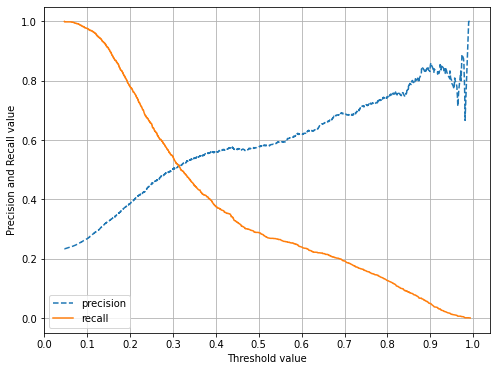

In [121]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)